In [2]:
import pandas as pd

data = pd.read_csv('mlb_2016.csv')

In [3]:
original_df = data.copy()
df = data.drop(columns='Unnamed: 0')
df.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,home_team,home_team_errors,...,temperature,wind_speed,wind_direction,sky,total_runs,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome
0,40030.0,New York Mets,1,7,3,2016-04-03,on grass,Night Game,Kansas City Royals,0,...,74.0,14.0,from Right to Left,Sunny,7,3.216667,regular season,1,0,Win
1,21621.0,Philadelphia Phillies,0,5,2,2016-04-06,on grass,Night Game,Cincinnati Reds,0,...,55.0,24.0,from Right to Left,Overcast,5,2.383333,regular season,1,0,Win
2,12622.0,Minnesota Twins,0,5,2,2016-04-06,on grass,Night Game,Baltimore Orioles,0,...,48.0,7.0,out to Leftfield,Unknown,6,3.183333,regular season,1,0,Win
3,18531.0,Washington Nationals,0,8,3,2016-04-06,on grass,Night Game,Atlanta Braves,1,...,65.0,10.0,from Right to Left,Cloudy,4,2.883333,regular season,0,1,Loss
4,18572.0,Colorado Rockies,1,8,4,2016-04-06,on grass,Day Game,Arizona Diamondbacks,0,...,77.0,0.0,in unknown direction,In Dome,7,2.650000,regular season,0,1,Loss


In [4]:
import numpy as np
display(df.info())
display(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 25 columns):
attendance           2460 non-null float64
away_team            2463 non-null object
away_team_errors     2463 non-null int64
away_team_hits       2463 non-null int64
away_team_runs       2463 non-null int64
date                 2463 non-null object
field_type           2463 non-null object
game_type            2463 non-null object
home_team            2463 non-null object
home_team_errors     2463 non-null int64
home_team_hits       2463 non-null int64
home_team_runs       2463 non-null int64
start_time           2463 non-null object
venue                2463 non-null object
day_of_week          2463 non-null object
temperature          2463 non-null float64
wind_speed           2463 non-null float64
wind_direction       2463 non-null object
sky                  2463 non-null object
total_runs           2463 non-null int64
game_hours_dec       2463 non-null float64
season        

None

attendance            True
away_team            False
away_team_errors     False
away_team_hits       False
away_team_runs       False
date                 False
field_type           False
game_type            False
home_team            False
home_team_errors     False
home_team_hits       False
home_team_runs       False
start_time           False
venue                False
day_of_week          False
temperature          False
wind_speed           False
wind_direction       False
sky                  False
total_runs           False
game_hours_dec       False
season               False
home_team_win        False
home_team_loss       False
home_team_outcome    False
dtype: bool

In [5]:
df = df.dropna()

In [6]:
matches = df.shape[0]
features = df.shape[1]-1
home_wins = len(df[df.home_team_outcome == 'Win'])
home_rate = home_wins / matches *100

print(f'No. of Matches:{matches}')
print(f'No of features:{features}')
print(f'Np. of Home Wins:{home_wins}')
print(f'Home Winning Rate:{"%.2f"%home_rate}%')

No. of Matches:2460
No of features:24
Np. of Home Wins:1302
Home Winning Rate:52.93%


In [7]:
home_teams = df.groupby('home_team').agg({'away_team_errors':'sum','away_team_hits':'sum','away_team_runs':'sum','home_team_errors':'sum',
                                          'home_team_hits':'sum','home_team_runs':'sum','total_runs':'sum','game_hours_dec':'sum','home_team_win':'sum',
                                          'home_team_loss':'sum','attendance':'mean','temperature':'mean','wind_speed':'mean',
                                          'game_hours_dec':'mean'}).reset_index().rename({'attendance':'avg_attendance',
                                                                                          'temperature':'avg_temp','wind_speed':'avg_wind_speed',
                                                                                          'game_hours_dec':'avg_game_duration'})
away_teams = df.groupby('away_team').agg({'away_team_errors':'sum','away_team_hits':'sum','away_team_runs':'sum','home_team_errors':'sum',
                                          'home_team_hits':'sum','home_team_runs':'sum','total_runs':'sum','game_hours_dec':'sum','home_team_win':'sum',
                                          'home_team_loss':'sum','attendance':'mean','temperature':'mean','wind_speed':'mean',
                                          'game_hours_dec':'mean'}).reset_index().rename({'attendance':'avg_attendance',
                                                                                          'temperature':'avg_temp','wind_speed':'avg_wind_speed',
                                                                                          'game_hours_dec':'avg_game_duration'})

In [8]:
home_teams.head()

,home_team,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,game_hours_dec,home_team_win,home_team_loss,attendance,temperature,wind_speed
0,Arizona Diamondbacks,50,855,493,42,765,411,904,3.284362,33,48,25138.469136,81.074074,2.469136
1,Atlanta Braves,58,712,404,60,712,335,739,3.205144,31,50,24949.555556,81.308642,8.370370
2,Baltimore Orioles,42,699,336,39,688,376,712,2.977572,50,31,26819.061728,74.037037,5.061728
3,Boston Red Sox,50,741,384,40,853,480,864,3.271545,47,35,36523.951220,69.743902,12.256098
4,Chicago Cubs,45,596,264,53,723,413,677,3.064981,62,27,40103.662921,69.134831,8.741573


In [10]:
home_teams.corr()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,game_hours_dec,home_team_win,home_team_loss,attendance,temperature,wind_speed
away_team_errors,1.000000,0.238957,0.217966,0.108779,0.429229,0.291840,0.309057,0.343979,0.097446,-0.027514,0.147730,0.283427,0.001352
away_team_hits,0.238957,1.000000,0.928416,0.449132,0.463430,0.375891,0.791111,0.313485,-0.427701,0.446611,-0.194328,0.267362,0.128726
away_team_runs,0.217966,0.928416,1.000000,0.524583,0.427286,0.360155,0.825020,0.368514,-0.506284,0.535685,-0.249735,0.352616,0.070285
home_team_errors,0.108779,0.449132,0.524583,1.000000,-0.070765,-0.058676,0.282802,0.039401,-0.411562,0.470428,-0.247524,0.258528,0.162994
home_team_hits,0.429229,0.463430,0.427286,-0.070765,1.000000,0.930126,0.822729,0.497602,0.381553,-0.332276,0.269905,0.060684,0.266455
home_team_runs,0.291840,0.375891,0.360155,-0.058676,0.930126,1.000000,0.824316,0.465714,0.525068,-0.469325,0.347782,0.042945,0.197562
total_runs,0.309057,0.791111,0.825020,0.282802,0.822729,0.824316,1.000000,0.505742,0.010821,0.040788,0.059117,0.240001,0.162327
game_hours_dec,0.343979,0.313485,0.368514,0.039401,0.497602,0.465714,0.505742,1.000000,-0.052061,0.088060,0.167270,0.206348,0.065029
home_team_win,0.097446,-0.427701,-0.506284,-0.411562,0.381553,0.525068,0.010821,-0.052061,1.000000,-0.964640,0.496322,-0.118085,0.162639
home_team_loss,-0.027514,0.446611,0.535685,0.470428,-0.332276,-0.469325,0.040788,0.088060,-0.964640,1.000000,-0.479312,0.082177,-0.135957


In [11]:
away_teams.corr()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs,total_runs,game_hours_dec,home_team_win,home_team_loss,attendance,temperature,wind_speed
away_team_errors,1.000000,-0.186378,-0.075466,0.093621,0.189694,0.198742,0.088001,0.187982,0.348374,-0.248657,0.408902,0.336212,0.015189
away_team_hits,-0.186378,1.000000,0.668237,0.295009,-0.184150,-0.126980,0.450217,0.351603,-0.449575,0.519403,0.147375,-0.070789,0.123209
away_team_runs,-0.075466,0.668237,1.000000,0.242713,-0.202373,-0.190335,0.673503,0.348816,-0.526933,0.623262,0.351145,-0.107422,-0.120791
home_team_errors,0.093621,0.295009,0.242713,1.000000,-0.216324,0.001895,0.199678,0.203237,-0.242093,0.295760,0.092560,-0.048108,0.080190
home_team_hits,0.189694,-0.184150,-0.202373,-0.216324,1.000000,0.698671,0.360763,-0.134282,0.458012,-0.565188,-0.349534,0.092306,0.313596
home_team_runs,0.198742,-0.126980,-0.190335,0.001895,0.698671,1.000000,0.597480,-0.022656,0.683954,-0.683918,-0.057449,0.134289,0.216813
total_runs,0.088001,0.450217,0.673503,0.199678,0.360763,0.597480,1.000000,0.267859,0.084575,-0.005865,0.243565,0.013369,0.064585
game_hours_dec,0.187982,0.351603,0.348816,0.203237,-0.134282,-0.022656,0.267859,1.000000,-0.128034,0.247234,0.481297,0.238597,0.126807
home_team_win,0.348374,-0.449575,-0.526933,-0.242093,0.458012,0.683954,0.084575,-0.128034,1.000000,-0.937846,-0.065484,0.077370,0.078314
home_team_loss,-0.248657,0.519403,0.623262,0.295760,-0.565188,-0.683918,-0.005865,0.247234,-0.937846,1.000000,0.240632,-0.161274,-0.136089


In [12]:
target = df['home_team_win']
features = df.drop(['home_team_win','home_team_outcome','home_team_loss','home_team_runs','away_team_runs','total_runs','away_team_errors','away_team_hits','home_team_hits','home_team_errors'], axis=1)

In [13]:
display(target.head())
display(features.head())

0    1
1    1
2    1
3    0
4    0
Name: home_team_win, dtype: int64

,attendance,away_team,date,field_type,game_type,home_team,start_time,venue,day_of_week,temperature,wind_speed,wind_direction,sky,game_hours_dec,season
0,40030.0,New York Mets,2016-04-03,on grass,Night Game,Kansas City Royals,7:38 p.m. Local,Kauffman Stadium,Sunday,74.0,14.0,from Right to Left,Sunny,3.216667,regular season
1,21621.0,Philadelphia Phillies,2016-04-06,on grass,Night Game,Cincinnati Reds,7:11 p.m. Local,Great American Ball Park,Wednesday,55.0,24.0,from Right to Left,Overcast,2.383333,regular season
2,12622.0,Minnesota Twins,2016-04-06,on grass,Night Game,Baltimore Orioles,7:07 p.m. Local,Oriole Park at Camden Yards,Wednesday,48.0,7.0,out to Leftfield,Unknown,3.183333,regular season
3,18531.0,Washington Nationals,2016-04-06,on grass,Night Game,Atlanta Braves,7:10 p.m. Local,Turner Field,Wednesday,65.0,10.0,from Right to Left,Cloudy,2.883333,regular season
4,18572.0,Colorado Rockies,2016-04-06,on grass,Day Game,Arizona Diamondbacks,12:40 p.m. Local,Chase Field,Wednesday,77.0,0.0,in unknown direction,In Dome,2.650000,regular season


### Date Pre-Process

In [14]:
# Date Column Datatype Conversion 
features.date = features.date.astype('datetime64[ns]')
days_dict = {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7,
}

# Change week days to numbers
features.day_of_week = features.day_of_week.map(days_dict)

# Select the Month
features['Month'] = features.date.dt.month



In [16]:
df.date = df.date.astype('datetime64[ns]')
df['Week'] = df.date.dt.week

In [26]:
# home[home.home_team == 'Boston Red Sox'].plot(x='Week', y='home_team_runs',figsize=(20,7))
# away[away.away_team == 'Boston Red Sox'].plot(x='Month', y='home_team_runs',figsize=(20,7))
home = df[df.home_team == 'Boston Red Sox'].groupby('Week')['home_team_runs','home_team_errors'].sum()
away = df[df.away_team == 'Boston Red Sox'].groupby('Week')['away_team_runs','away_team_errors'].sum()
display(home)
display(away)

,home_team_runs,home_team_errors
Week,,
15,28,0
16,18,3
17,32,2
19,73,6
20,16,3
21,20,1
22,12,1
24,21,1
25,16,4


,away_team_runs,away_team_errors
Week,,
14,28,3
16,16,2
17,12,1
18,22,0
20,11,2
21,19,3
22,29,1
23,33,3
25,13,3


In [27]:
test_runs = pd.concat([home, away.groupby(level=0).sum()], axis=1).fillna(0)
test_runs['Runs'] = test_runs.home_team_runs + test_runs.away_team_runs
test_runs['Errors'] = test_runs.home_team_errors + test_runs.away_team_errors


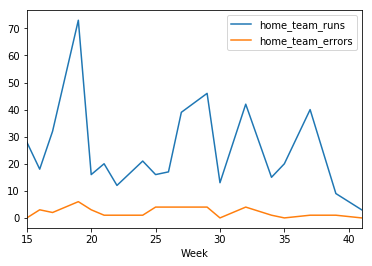

In [38]:
home.plot()

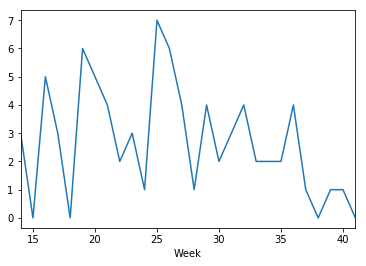

In [36]:
test_runs.Errors.plot()

In [1]:
test_teams = ['Miami Marlins', 'Boston Red Sox']
home_series = df[df.home_team.isin(test_teams)].groupby(['Week','home_team']).sum()
away_series = df[df.away_team.isin(test_teams)].groupby('Week')['away_team_runs'].sum()
# home_series.plot(y='home_team_runs',figsize=(18,6))
home_series

NameError: name 'df' is not defined

In [105]:

# drop date column
features = features.drop('date', axis=1)

,attendance,away_team,field_type,game_type,home_team,start_time,venue,day_of_week,temperature,wind_speed,wind_direction,sky,game_hours_dec,season,home_team_win,Month,Year
0,40030.0,New York Mets,on grass,Night Game,Kansas City Royals,7:38 p.m. Local,Kauffman Stadium,NaN,74.0,14.0,from Right to Left,Sunny,3.216667,regular season,1,4,2016
1,21621.0,Philadelphia Phillies,on grass,Night Game,Cincinnati Reds,7:11 p.m. Local,Great American Ball Park,NaN,55.0,24.0,from Right to Left,Overcast,2.383333,regular season,1,4,2016
2,12622.0,Minnesota Twins,on grass,Night Game,Baltimore Orioles,7:07 p.m. Local,Oriole Park at Camden Yards,NaN,48.0,7.0,out to Leftfield,Unknown,3.183333,regular season,1,4,2016
3,18531.0,Washington Nationals,on grass,Night Game,Atlanta Braves,7:10 p.m. Local,Turner Field,NaN,65.0,10.0,from Right to Left,Cloudy,2.883333,regular season,0,4,2016
4,18572.0,Colorado Rockies,on grass,Day Game,Arizona Diamondbacks,12:40 p.m. Local,Chase Field,NaN,77.0,0.0,in unknown direction,In Dome,2.650000,regular season,0,4,2016
5,28386.0,Seattle Mariners,on grass,Night Game,Texas Rangers,7:07 p.m. Local,Globe Life Park in Arlington,NaN,81.0,12.0,from Right to Left,Cloudy,3.500000,regular season,0,4,2016
6,12757.0,Toronto Blue Jays,on turf,Night Game,Tampa Bay Rays,7:10 p.m. Local,Tropicana Field,NaN,72.0,0.0,in unknown direction,In Dome,3.116667,regular season,1,4,2016
7,28329.0,Los Angeles Dodgers,on grass,Night Game,San Diego Padres,7:11 p.m. Local,Petco Park,NaN,70.0,6.0,from Left to Right,Unknown,2.600000,regular season,0,4,2016
8,26049.0,St. Louis Cardinals,on grass,Night Game,Pittsburgh Pirates,7:08 p.m. Local,PNC Park,NaN,40.0,7.0,out to Leftfield,Sunny,3.450000,regular season,1,4,2016
9,10478.0,Chicago White Sox,on grass,Night Game,Oakland Athletics,7:08 p.m. Local,Oakland-Alameda County Coliseum,NaN,70.0,8.0,out to Rightfield,Cloudy,3.466667,regular season,0,4,2016


In [214]:
home_teams.mean()

away_team_errors       47.566667
away_team_hits        718.900000
away_team_runs        362.033333
home_team_errors       48.066667
home_team_hits        706.133333
home_team_runs        370.666667
total_runs            732.700000
game_hours_dec          3.085184
home_team_win          43.400000
home_team_loss         38.566667
attendance          30288.152524
temperature            73.834290
wind_speed              7.471576
dtype: float64

In [13]:
away_teams.mean()

away_team_errors       47.566667
away_team_hits        718.900000
away_team_runs        362.033333
home_team_errors       48.066667
home_team_hits        706.133333
home_team_runs        370.666667
total_runs            732.700000
game_hours_dec          3.084544
home_team_win          43.400000
home_team_loss         38.566667
attendance          30340.915754
temperature            73.820114
wind_speed              7.492091
dtype: float64

In [39]:
from baseball_scraper import batting_stats_range

batting_stats_range('2019-04-01','2019-04-14')


,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1,Jose Abreu,32,216,MLB-AL,Chicago,11,48,44,7,7,...,0,1,1,2,0,0.159,0.208,0.295,0.504,547989
2,Ronald Acuna Jr.,21,216,MLB-NL,Atlanta,12,54,43,12,14,...,0,0,2,1,0,0.326,0.442,0.744,1.186,660670
3,Willy Adames,23,216,MLB-AL,Tampa Bay,12,51,46,10,14,...,0,0,0,0,0,0.304,0.373,0.435,0.807,642715
4,Matt Adams,30,217,MLB-NL,Washington,9,16,15,0,3,...,0,1,1,0,0,0.200,0.188,0.333,0.521,571431
5,Ehire Adrianza,29,220,MLB-AL,Minnesota,6,18,15,3,2,...,0,1,0,0,0,0.133,0.222,0.133,0.356,501303
6,Jesus Aguilar,29,216,MLB-NL,Milwaukee,10,44,33,3,5,...,0,1,2,0,0,0.152,0.310,0.212,0.522,542583
7,Nick Ahmed,29,216,MLB-NL,Arizona,12,48,47,10,14,...,0,1,1,1,0,0.298,0.292,0.447,0.738,605113
8,Hanser Alberto,26,216,MLB-AL,Baltimore,11,39,38,1,10,...,0,0,0,0,0,0.263,0.282,0.289,0.572,593643
9,Ozzie Albies,22,216,MLB-NL,Atlanta,12,56,51,9,17,...,0,0,0,2,1,0.333,0.393,0.490,0.883,645277
10,Sandy Alcantara,23,218,MLB-NL,Miami,2,3,3,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,645261


In [396]:
data.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB',
       'CS', 'BA', 'OBP', 'SLG', 'OPS', 'mlb_ID'],
      dtype='object')

In [85]:
import statsapi

In [273]:
player_test = statsapi.lookup_player('Austin')
player_df = pd.DataFrame(player_test)

In [295]:
player_df.currentTeam = player_df.currentTeam.astype(str)
player_df.currentTeam 

0     {'id': 136}
1     {'id': 116}
2     {'id': 135}
3     {'id': 158}
4     {'id': 119}
5     {'id': 146}
6     {'id': 143}
7     {'id': 146}
8     {'id': 110}
9     {'id': 135}
10    {'id': 116}
11    {'id': 139}
12    {'id': 143}
13    {'id': 111}
14    {'id': 136}
15    {'id': 139}
16    {'id': 113}
17    {'id': 144}
18    {'id': 115}
19    {'id': 147}
20    {'id': 137}
21    {'id': 120}
22    {'id': 110}
Name: currentTeam, dtype: object

In [191]:
# for team in player_test.currentTeam:
#     print(statsapi.lookup_team(team))
# teams = [player_test['currentTeam'] for teamid in player_test]
team_ids = [list(team['currentTeam'].values()) for team in player_test]

In [250]:
team_ids = []
for teamid in player_test:
    names = list(teamid['currentTeam'].values())
    for teamname in names:
        team_ids.append(statsapi.lookup_team(teamname))

In [271]:
final_names = []
for team in team_ids:
    for name in team:
        final_names.append(name['name'])

In [297]:
player_df = player_df.replace({'{"id"':'5'})
player_df

,boxscoreName,currentTeam,firstLastName,firstName,fullFMLName,fullLFMName,fullName,id,initLastName,lastFirstName,lastInitName,lastName,mlbDebutDate,nameFirstLast,nickName,primaryNumber,primaryPosition,useName
0,Adams,{'id': 136},Austin Adams,Austin,Austin Lance Adams,"Adams, Austin Lance",Austin Adams,613534,A Adams,"Adams, Austin","Adams, A",Adams,2017-07-15,Austin Adams,A2,63,"{'code': '1', 'abbreviation': 'P'}",Austin
1,"Adams, A",{'id': 116},Austin Adams,Austin,Austin David Adams,"Adams, Austin David",Austin Adams,542866,A Adams,"Adams, Austin","Adams, A",Adams,2014-07-12,Austin Adams,NaN,50,"{'code': '1', 'abbreviation': 'P'}",Austin
2,"Allen, A",{'id': 135},Austin Allen,Austin,Austin Michael Allen,"Allen, Austin Michael",Austin Allen,664119,A Allen,"Allen, Austin","Allen, A",Allen,2019-05-11,Austin Allen,Double AA,62,"{'code': '2', 'abbreviation': 'C'}",Austin
3,Austin,{'id': 158},Tyler Austin,Christopher,Christopher Tyler Austin,"Austin, Christopher Tyler",Tyler Austin,592122,T Austin,"Austin, Tyler","Austin, T",Austin,2016-08-13,Tyler Austin,Ta,29,"{'code': '3', 'abbreviation': '1B'}",Tyler
4,"Barnes, A",{'id': 119},Austin Barnes,Austin,Austin Scott Barnes,"Barnes, Austin Scott",Austin Barnes,605131,A Barnes,"Barnes, Austin","Barnes, A",Barnes,2015-05-24,Austin Barnes,Sam,15,"{'code': '2', 'abbreviation': 'C'}",Austin
5,Brice,{'id': 146},Austin Brice,Austin,Austin Robert Brice,"Brice, Austin Robert",Austin Brice,592169,A Brice,"Brice, Austin","Brice, A",Brice,2016-08-12,Austin Brice,Bear,37,"{'code': '1', 'abbreviation': 'P'}",Austin
6,"Davis, A",{'id': 143},Austin Davis,Austin,Austin Richard Davis,"Davis, Austin Richard",Austin Davis,656354,A Davis,"Davis, Austin","Davis, A",Davis,2018-06-20,Austin Davis,Big Fudge,54,"{'code': '1', 'abbreviation': 'P'}",Austin
7,Dean,{'id': 146},Austin Dean,Austin,Austin James Dean,"Dean, Austin James",Austin Dean,621573,A Dean,"Dean, Austin","Dean, A",Dean,2018-08-15,Austin Dean,NaN,44,"{'code': '7', 'abbreviation': 'LF'}",Austin
8,Hays,{'id': 110},Austin Hays,Austin,Austin Hays,"Hays, Austin",Austin Hays,669720,A Hays,"Hays, Austin","Hays, A",Hays,2017-09-07,Austin Hays,NaN,21,"{'code': '9', 'abbreviation': 'RF'}",Austin
9,Hedges,{'id': 135},Austin Hedges,Austin,Austin Charles Hedges,"Hedges, Austin Charles",Austin Hedges,595978,A Hedges,"Hedges, Austin","Hedges, A",Hedges,2015-05-04,Austin Hedges,Hedgey,18,"{'code': '2', 'abbreviation': 'C'}",Austin


In [299]:
player_df = player_df.drop('currentTeam', axis=1)
player_df['Team'] = final_names

In [303]:
player_df.columns

Index(['boxscoreName', 'firstLastName', 'firstName', 'fullFMLName',
       'fullLFMName', 'fullName', 'id', 'initLastName', 'lastFirstName',
       'lastInitName', 'lastName', 'mlbDebutDate', 'nameFirstLast', 'nickName',
       'primaryNumber', 'primaryPosition', 'useName', 'Team'],
      dtype='object')

In [306]:
player_df[['firstName', 'lastName','nickName','Team','primaryNumber','primaryPosition','mlbDebutDate']]

,firstName,lastName,nickName,Team,primaryNumber,primaryPosition,mlbDebutDate
0,Austin,Adams,A2,Seattle Mariners,63,"{'code': '1', 'abbreviation': 'P'}",2017-07-15
1,Austin,Adams,NaN,Detroit Tigers,50,"{'code': '1', 'abbreviation': 'P'}",2014-07-12
2,Austin,Allen,Double AA,San Diego Padres,62,"{'code': '2', 'abbreviation': 'C'}",2019-05-11
3,Christopher,Austin,Ta,Milwaukee Brewers,29,"{'code': '3', 'abbreviation': '1B'}",2016-08-13
4,Austin,Barnes,Sam,Los Angeles Dodgers,15,"{'code': '2', 'abbreviation': 'C'}",2015-05-24
5,Austin,Brice,Bear,Miami Marlins,37,"{'code': '1', 'abbreviation': 'P'}",2016-08-12
6,Austin,Davis,Big Fudge,Philadelphia Phillies,54,"{'code': '1', 'abbreviation': 'P'}",2018-06-20
7,Austin,Dean,NaN,Miami Marlins,44,"{'code': '7', 'abbreviation': 'LF'}",2018-08-15
8,Austin,Hays,NaN,Baltimore Orioles,21,"{'code': '9', 'abbreviation': 'RF'}",2017-09-07
9,Austin,Hedges,Hedgey,San Diego Padres,18,"{'code': '2', 'abbreviation': 'C'}",2015-05-04


In [188]:
statsapi.player_stat_data(592169,group='[pitching]', type='season')

{'id': 592169,
 'first_name': 'Austin',
 'last_name': 'Brice',
 'active': True,
 'current_team': 'Miami Marlins',
 'position': 'P',
 'nickname': 'Bear',
 'last_played': None,
 'mlb_debut': '2016-08-12',
 'bat_side': 'Right',
 'pitch_hand': 'Right',
 'stats': [{'type': 'season',
   'group': 'pitching',
   'stats': {'gamesPlayed': 36,
    'gamesStarted': 0,
    'groundOuts': 42,
    'airOuts': 49,
    'runs': 21,
    'homeRuns': 7,
    'strikeOuts': 46,
    'baseOnBalls': 18,
    'intentionalWalks': 2,
    'hits': 37,
    'avg': '.214',
    'atBats': 173,
    'obp': '.312',
    'slg': '.364',
    'ops': '.676',
    'caughtStealing': 0,
    'stolenBases': 2,
    'stolenBasePercentage': '1.000',
    'groundIntoDoublePlay': 1,
    'numberOfPitches': 779,
    'era': '3.43',
    'inningsPitched': '44.2',
    'wins': 1,
    'losses': 0,
    'saves': 0,
    'saveOpportunities': 1,
    'holds': 7,
    'earnedRuns': 17,
    'whip': '1.23',
    'battersFaced': 199,
    'gamesPitched': 36,
    'com

In [189]:
print( statsapi.linescore(565997) )

Final    1 2 3 4 5 6 7 8 9  R   H   E  
Phillies 1 0 0 0 0 0 0 3 2  6   10  0  
Mets     0 0 0 0 0 0 0 0 0  0   6   3  


In [ ]:
stat